This notebook analyzes data from https://github.com/HuthLab/deep-fMRI-dataset. To set up, see instructions in the `deep-fMRI-dataset` folder.

In [1]:
%load_ext autoreload
%autoreload 2
import datasets
import numpy as np
from os.path import join
from ridge_utils.SemanticModel import SemanticModel
from matplotlib import pyplot as plt
from typing import List
from sklearn.linear_model import RidgeCV, LogisticRegressionCV
from sklearn.feature_extraction.text import CountVectorizer
from feature_spaces import em_data_dir, data_dir, results_dir
from collections import defaultdict
import pandas as pd
import os
import seaborn as sns
# from fit_linear_models import get_dsets
from ridge_utils.SemanticModel import SemanticModel
import encoding_utils, feature_spaces
from transformers.pipelines.pt_utils import KeyDataset
from feature_spaces import *
from transformers import pipeline
import datasets

In [6]:
def get_mets(c):
    return {
        'mean': np.mean(c),
        'mean>0': np.mean(c > 0),
        'mean>.2': np.mean(c > 0.2),
        'mean-top98': np.mean(c[c >= np.percentile(c, 98)]),
    }

corrs = {
    k: np.load(join(results_dir, 'encoding', k, 'UTS03', 'corrs.npz'))['arr_0']
        for k in sorted(os.listdir(join(results_dir, 'encoding')))
        # for k in ['glove', 'eng1000', 'bert-10__ndel=4']
        if os.path.exists(join(results_dir, 'encoding', k, 'UTS03', 'corrs.npz'))
}


In [25]:
mets = []
for k in corrs:
    c = corrs[k]
    met = get_mets(c)
    met['model'] = k
    mets.append(met)
mets = pd.DataFrame.from_dict(mets).round(3)

In [26]:
mets.style.background_gradient(axis='index')

,mean,mean>0,mean>.2,mean-top98,model
0,0.035000,0.562000,0.117000,0.422000,bert-10__ndel=1
1,0.055000,0.586000,0.176000,0.511000,bert-10__ndel=2
2,0.061000,0.584000,0.199000,0.544000,bert-10__ndel=3
3,0.062000,0.580000,0.208000,0.551000,bert-10__ndel=4
4,0.053000,0.596000,0.162000,0.488000,bert-20__ndel=1
5,0.061000,0.597000,0.190000,0.525000,bert-20__ndel=2
6,0.014000,0.525000,0.051000,0.315000,bert-3__ndel=1
7,0.043000,0.575000,0.142000,0.465000,bert-3__ndel=2
8,0.056000,0.581000,0.186000,0.521000,bert-3__ndel=3
9,0.059000,0.577000,0.200000,0.538000,bert-3__ndel=4


In [56]:
ndels = [1, 2, 3, 4]
ngram_sizes = [3, 5, 10, 20]
vals = np.zeros((len(ndels), len(ngram_sizes)))
for i, ndel in enumerate(ndels):
    for j, ngram_size in enumerate(ngram_sizes):
        s = f'bert-{ngram_size}__ndel={ndel}'
        if s in mets.model.values:
            vals[i, j] = mets[mets.model == s]['mean-top98'].values

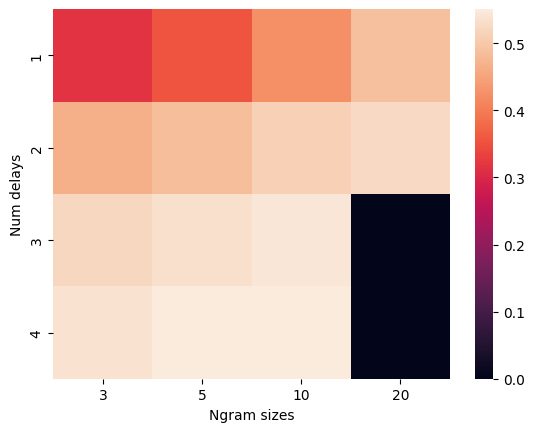

In [57]:
sns.heatmap(vals, xticklabels=ngram_sizes, yticklabels=ndels)
plt.xlabel('Ngram sizes')
plt.ylabel('Num delays')
plt.show()

glove	mean 0.04	>0 0.57	>0.2 0.15	top-98 perc 0.49
eng1000	mean 0.04	>0 0.53	>0.2 0.17	top-98 perc 0.50
bert-10__ndel=4	mean 0.06	>0 0.58	>0.2 0.21	top-98 perc 0.55


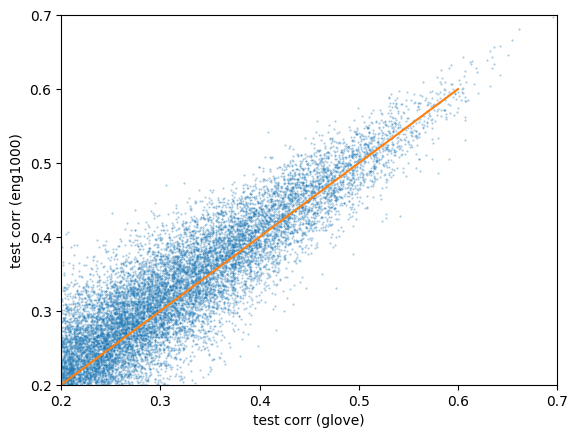

In [2]:
plt.plot(corrs['glove'], corrs['eng1000'], '.', alpha=0.4, ms=1)
plt.plot([-.4, .6], [-.4, .6])
plt.xlim([0.2, .7])
plt.ylim([0.2, 0.7])
plt.xlabel('test corr (glove)')
plt.ylabel('test corr (eng1000)')
plt.show()

In [ ]:
plt.hist(corrs['glove'])
plt.hist(corrs['bert-10__ndel=4'], alpha=0.8)

In [ ]:
# compare two subjects
corrs_glove_01 = np.load(join(results_dir, 'glove', 'UTS01', 'corrs.npz'))['arr_0']
print('01', np.mean(corrs_glove_01), '03', np.mean(corrs_glove))